In [1]:
import pandas as pd
import numpy as np
import random
import re
from datetime import datetime
%matplotlib inline

In [2]:
gamelogs = pd.read_csv("PlayerGameLog18.csv")

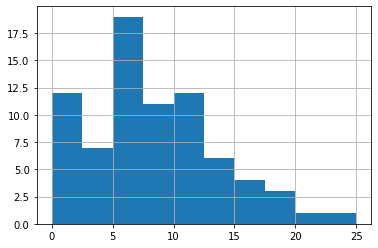

In [3]:
gamelogs[gamelogs['Player_ID'] == 203085]['PTS'].hist()

In [4]:
gamelogs

,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
0,22018,101106,21801225,10-Apr-19,GSW @ MEM,L,18,0,1,0.000,...,5,6,1,1,2,5,1,0,-15,1
1,22018,101106,21801205,7-Apr-19,GSW vs. LAC,W,7,1,1,1.000,...,2,3,0,1,1,0,3,2,13,1
2,22018,101106,21801191,5-Apr-19,GSW vs. CLE,W,21,3,6,0.500,...,5,7,0,0,1,0,4,6,15,1
3,22018,101106,21801164,2-Apr-19,GSW vs. DEN,W,4,2,3,0.667,...,2,3,1,0,0,0,1,4,7,1
4,22018,101106,21801150,31-Mar-19,GSW vs. CHA,W,11,3,4,0.750,...,7,8,0,0,1,0,2,6,20,1
5,22018,101106,21801132,29-Mar-19,GSW @ MIN,L,2,0,0,0.000,...,1,1,0,0,0,0,0,0,-1,1
6,22018,101106,21801118,27-Mar-19,GSW @ MEM,W,7,0,0,0.000,...,2,2,1,0,0,0,0,0,-6,1
7,22018,101106,21801101,24-Mar-19,GSW vs. DET,W,24,4,5,0.800,...,5,5,3,0,3,0,3,8,0,1
8,22018,101106,21801079,21-Mar-19,GSW vs. IND,W,9,1,8,0.125,...,3,7,1,0,0,1,2,4,-12,1
9,22018,101106,21801062,19-Mar-19,GSW @ MIN,W,13,1,4,0.250,...,4,6,3,0,0,1,3,2,-9,1


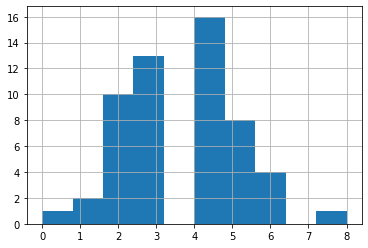

In [6]:
gamelogs[gamelogs['Player_ID'] == 2544]['TOV'].hist()

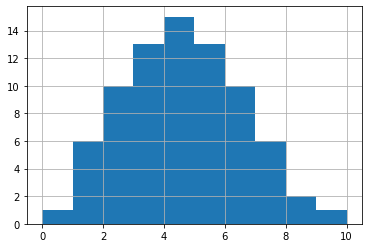

In [7]:
gamelogs[gamelogs['Player_ID'] == 202331]['AST'].hist()

In [8]:
gamelogs[gamelogs['Player_ID']==2544]['PTS'].std()

7.087714034559397

In [9]:
group = gamelogs.groupby(by='Player_ID')['PTS'].agg(['mean','std'])
g_ass = gamelogs.groupby(by='Player_ID')['AST'].agg(['mean','std'])
g_reb = gamelogs.groupby(by='Player_ID')['REB'].agg(['mean','std'])
g_tov = gamelogs.groupby(by='Player_ID')['TOV'].agg(['mean','std'])
g_stl = gamelogs.groupby(by='Player_ID')['STL'].agg(['mean','std'])
g_blk = gamelogs.groupby(by='Player_ID')['BLK'].agg(['mean','std'])

group.reset_index(inplace=True)
g_ass.reset_index(inplace=True)
g_reb.reset_index(inplace=True)
g_tov.reset_index(inplace=True)
g_stl.reset_index(inplace=True)
g_blk.reset_index(inplace=True)

In [10]:
group.fillna(0,inplace=True)
g_ass.fillna(0, inplace=True)
g_reb.fillna(0, inplace=True)
g_tov.fillna(0, inplace=True)
g_stl.fillna(0, inplace=True)
g_blk.fillna(0, inplace=True)

In [11]:
group.sort_values(by='mean')[:5]

,Player_ID,mean,std
260,204066,0.0,0.0
466,1628994,0.0,0.0
495,1629055,0.0,0.0
56,201281,0.0,0.0
502,1629093,0.0,0.0


In [12]:
int(np.random.normal(0,0,1))

0

In [13]:
s = np.random.normal(27.36, 7.087, 1000)

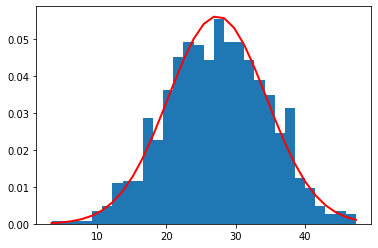

In [14]:
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(7.087 * np.sqrt(2 * np.pi)) *
             np.exp( - (bins - 27.36)**2 / (2 * 7.087**2) ),
    linewidth=2, color='r')
plt.show()

In [15]:
np.random.normal(27,8,1)

array([26.52371511])

In [16]:
def sim_player(playerID, numSims=1):
    player_games = gamelogs[gamelogs["Player_ID"]==playerID].drop(columns=["SEASON_ID", "Player_ID", "Game_ID", "MATCHUP", "WL", "VIDEO_AVAILABLE"])
    simmed_games = []
    sim = 1
    while sim <= numSims:
        randGame = random.randint(1,83)
        if randGame > len(player_games):
            #player_games.iloc[len(player_games)]=np.zeros(20)
            return 0
        else:
            return (round(int(np.random.normal(group[group['Player_ID']==playerID]['mean'],group[group['Player_ID']==playerID]['std'],1))))
        sim += 1

In [92]:
def sim_player2(playerID, numSims=1):
    player_games = gamelogs[gamelogs["Player_ID"]==playerID].drop(columns=["SEASON_ID", "Player_ID", "Game_ID", "MATCHUP", "WL", "VIDEO_AVAILABLE"])
    simmed_games = []
    sim = 1
    while sim <= numSims:
        randGame = random.randint(1,83)
        if randGame > len(player_games):
            #player_games.iloc[len(player_games)]=np.zeros(20)
            return 0
        else:
            pts = (round(int(np.random.normal(group[group['Player_ID']==playerID]['mean'],group[group['Player_ID']==playerID]['std'],1))))
            reb = (round(int(np.random.normal(g_reb[g_reb['Player_ID']==playerID]['mean'],g_reb[g_reb['Player_ID']==playerID]['std'],1))))
            ass = (round(int(np.random.normal(g_ass[g_ass['Player_ID']==playerID]['mean'],g_ass[g_ass['Player_ID']==playerID]['std'],1))))
            stl = (round(int(np.random.normal(g_stl[g_stl['Player_ID']==playerID]['mean'],g_stl[g_stl['Player_ID']==playerID]['std'],1))))
            blk = (round(int(np.random.normal(g_blk[g_blk['Player_ID']==playerID]['mean'],g_blk[g_blk['Player_ID']==playerID]['std'],1))))
            tov = (round(int(np.random.normal(g_tov[g_tov['Player_ID']==playerID]['mean'],g_tov[g_tov['Player_ID']==playerID]['std'],1))))
            score = pts + round(1.7*reb) + round(2*ass) + round(9*stl)+ round(6*blk)-round(5*tov)
            if score >= 0:
                print(score)
                return score
            
            else:
                return 0
        sim += 1

In [18]:
sim_player(2544, 1)

57

In [19]:
sim_player(1, 3)

0

In [109]:
sim_player2(2544, 11)

0